<a href="https://colab.research.google.com/github/Sura3607/object-collision/blob/main/experiments/experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!git clone https://github.com/Sura3607/object-collision.git

In [ ]:
import os
os.chdir('object-collision')

In [ ]:
!pip3 install -r requirements.txt

In [ ]:
import cv2
import numpy as np

from src.core import base, active_contour_snake, chan_vese_collision, watershed

"""
base:                   bfs_obj_collision, dfs_obj_collision
chan_vese:              chan_vese
watershed:              process_frame_watershed
active_contour_snake:   active_contour_snake, collision_snake
"""

'\nbase:                   bfs_obj_collision, dfs_obj_collision\nchan_vese:              chan_vese\nwatershed:              process_frame_watershed\nactive_contour_snake:   active_contour_snake, collision_snake\n'

In [ ]:
import cv2
import numpy as np
from skimage.segmentation import chan_vese
from skimage.measure import label
from google.colab.patches import cv2_imshow
from google.colab import files
import pytictoc
# Đọc video

cap = cv2.VideoCapture(r'/content/object-collision/data/video/video_white.mp4')
t = pytictoc.TicToc()
frame_count = [i for i in range(1,int(cap.get(cv2.CAP_PROP_FRAME_COUNT)+1))]
time_counts = []
while True:
    ret, frame = cap.read()
    if not ret:
        break

    t.tic()
    markers, masks, centroids, radii = watershed.process_frame_watershed(frame)
    snakes = active_contour_snake.active_contour_snake(frame, centroids, radii)
    if (active_contour_snake.collision_snake(snakes, 1)):
      print("Va chạm")
      print(cap.get(cv2.CAP_PROP_POS_FRAMES))
    time_counts.append(t.tocvalue())

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Va chạm
98.0
Va chạm
188.0
Va chạm
190.0
Va chạm
191.0
Va chạm
237.0


In [ ]:
import pandas as pd
df = pd.DataFrame(columns = ['Frame', 'Time'], data = list(zip(frame_count, time_counts)))
df.to_csv('chan-vese video don sac 2 vat the.csv')

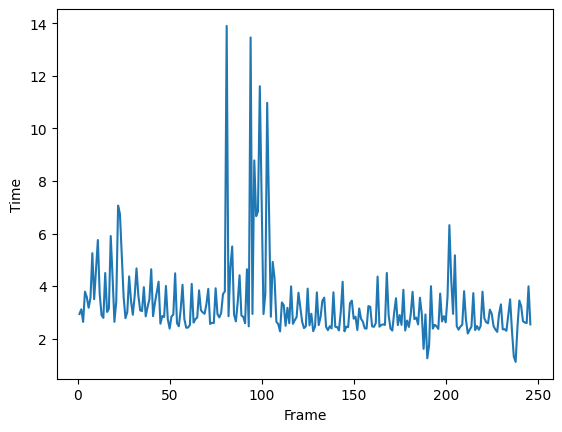

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Frame'], df['Time'])
plt.xlabel('Frame')
plt.ylabel('Time')
plt.show()

In [ ]:
# Đọc video
import pytictoc
cap = cv2.VideoCapture(r'/content/object-collision/data/video/black_white_collision_02.mp4')
t = pytictoc.TicToc()
frame_count = [i for i in range(1,int(cap.get(cv2.CAP_PROP_FRAME_COUNT)+1))]
time_counts = []
print(frame_count)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    t.tic()
    num_features = chan_vese_collision.chan_vese_collision(frame)
    if (num_features == 1):
      print("Va chạm")
      print(cap.get(cv2.CAP_PROP_POS_FRAMES))
    time_counts.append(t.tocvalue())

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from skimage.segmentation import chan_vese
from skimage.measure import label
from google.colab.patches import cv2_imshow
from google.colab import files
import pytictoc
# Đọc video

cap = cv2.VideoCapture(r'/content/object-collision/data/video/video_black.mp4')
t = pytictoc.TicToc()
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
s = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    t.tic()
    markers, masks, centroids, radii = watershed.process_frame_watershed(frame)
    snakes = active_contour_snake.active_contour_snake(frame, centroids, radii)
    if (active_contour_snake.collision_snake(snakes, 200)):
      print("Va chạm")
      print(cap.get(cv2.CAP_PROP_POS_FRAMES))
    else:
      print("Không va chạm")
    cv2_imshow(frame)
    s += t.tocvalue()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

print(s/frame_count)

In [ ]:
# Đọc video
import pytictoc
cap = cv2.VideoCapture(r'/content/object-collision/data/video/video_white.mp4')
t = pytictoc.TicToc()
frame_count = [i for i in range(1,int(cap.get(cv2.CAP_PROP_FRAME_COUNT)+1))]
time_counts = []
print(frame_count)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    t.tic()
    num_features = chan_vese_collision.chan_vese_collision(frame)
    if (num_features == 1 or num_features == 2):
      print("Va chạm")
      print(cap.get(cv2.CAP_PROP_POS_FRAMES))
    time_counts.append(t.tocvalue())

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22